# Лінійна регресія (1D)

In [163]:
import numpy as np
import matplotlib.pyplot as plt

In [164]:
def train_test_split(X, Y, test_size):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, int(100 * (1 - test_size)))

    x_train = X[split]
    y_train = Y[split]
    x_test =  X[~split]
    y_test = Y[~split]

    return x_train, y_train, x_test, y_test

Згенеруйте синтетичний набір точок виду y = ax + b + noise.

Візуалізуйте результат за допомогою (matplotlib).

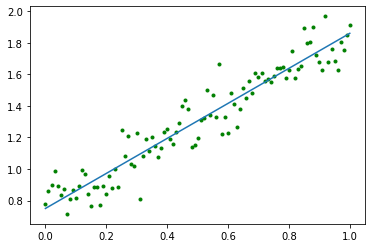

In [165]:
a = 1.11
b = 0.75

X = np.linspace(0, 1, 101)
Y = a * X + b + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, Y, marker = '.', color = 'g')
plt.plot(X, a * X + b)
plt.show()

Вирішіть задачу лінійної регресії для такого набору точок.

Параметри моделі знайдіть за допомогою градієнтного спуску.

In [166]:
def gradient_descent(x, y, learning_rate):
    a, b = 0, 0
    
    for _ in range(1000):
        y_ = a * x + b
        error = y - y_

        a -= learning_rate * (-2 * (x * error).mean())
        b -= learning_rate * (-2 * error.mean())
    
    print(a, b)
    return a, b

Порівняйте знайдені
параметри із значеннями (a, b).

In [167]:
x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size = 0.33)

a_, b_ = gradient_descent(x_train, y_train, learning_rate = 0.1)

1.0729732838271506 0.7768411135270052


# Логістична регресія (2D)

Згенеруйте два синтетичних набори точок на площині, додайте їм мітки класів (0 і 1).

Візуалізуйте результат за допомогою (matplotlib).

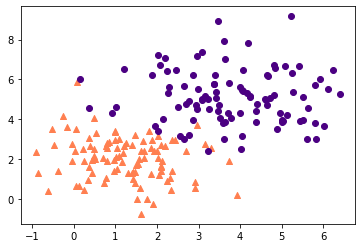

In [168]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, 100)

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='indigo')
plt.show()

In [169]:
x = np.concatenate([x_1, x_2])
labels = np.array([0] * 100 + [1] * 100)

x_train, labels_train, x_test, labels_test = train_test_split(x, labels, test_size = 0.33)

Розділіть дані на класи за допомогою
логістичної регресії.

In [170]:
class LogisticRegression:
    def __init__(self, max_iter):
        self.i = max_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def normalize(self, x):  
        return (x - x.mean()) / x.std()

    def fit(self, x, y, learning_rate):
        m, n = x.shape

        w = np.zeros((n, 1))
        b = 0

        x = self.normalize(x)
        y = y.reshape(m, 1)

        for _ in range(self.i):
            y_ = self.sigmoid(np.dot(x, w) + b)
            w -= learning_rate * np.dot(x.T,  y_ - y) / m
            b -= learning_rate * np.sum(y_ - y) / m

        self.w = w
        self.b = b

    def predict(self, x):
        x = self.normalize(x)
        predictions = sigmoid(np.dot(x, self.w) + self.b)

        self.p = np.array([1 if i > 0.5 else 0 for i in predictions])

    def accuracy(self, y):
        self.a = np.sum(y == self.p) / len(y)

In [171]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, labels_train, learning_rate = 0.01)
model.predict(x_test)
model.accuracy(labels_test)

Перевірте якість алгоритма за допомогою метрики accuracy (на
тестових даних).

In [172]:
model.a

0.9696969696969697